(content:chapter:differentialequations)=

# Alternating Current: Differential Equation Approach

```{include} includes/latex_imports.md
```

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


## Analysis Methods and Theorems with Alternating Current

### Voltage Divider

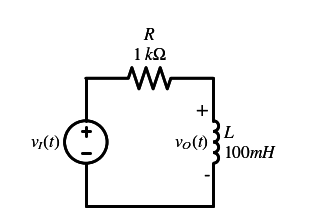

In [2]:
with schemdraw.Drawing(file='voltage-divider-resistor-inductor.svg') as d:
    d += elm.SourceV().label('$v_I(t)$').up()
    d += elm.Resistor().label('$R$\n$1~k\Omega$').right()
    d += elm.Inductor().label('$L$\n$100 mH$',loc='bot').down().label(['+', '$v_O(t)$','-'])
    d += elm.Line().left()

```{index} Voltage Divider
```

`````{admonition} Example
 

```{figure} voltage-divider-resistor-inductor.svg
---
height: 300px
name: voltage-divider-resistor-inductor
---
```

Find v$_O$(t) given that $v_I(t)=4 \cos(10000t+45^\circ)$ V

````{admonition} Solution using differential equations
:class: tip, dropdown
First remember that 

$$v_O(t) = L \frac{d~i(t)}{dt}$$

and that

$$ v_R(t) = R i(t).$$

Then, from Kirchhoff's Voltage Law:

$$ v_I(t) = v_R(t) + v_O(t)$$

or

$$ 4 \cos(10000t+45^\circ) = R i(t) + L \frac{d~i(t)}{dt}$$

Now, we need to solve this linear, first order differential equation ({cite:ts}`paul_dawkins_math_notes`).

```{note} Dawkins' approach 
:class: dropdown

{cite:ts}`paul_dawkins_math_notes` says to:

- Put the differential equation in the correct initial form.

$$ \frac{d~i(t)}{dt} + p(t) i(t) = g(t) $$

- Find the integrating factor $\mu(t)$ using

$$ \mu(t) = e^{\int p(t) dt} $$

- Multiply everything in the differential equation by $\mu(t)$ and verify that the left side becomes the product rule $(\mu(t)y(t))^′$ and write it as such.

- Integrate both sides, make sure you properly deal with the constant of integration.

- Solve for the solution $i(t)$.

```

To get the equation into the correct form, just swap sides and divide both sides by $L$:

$$  \frac{R}{L} i(t) +  \frac{d~i(t)}{dt} = \frac{4}{L} \cos(10000t+45^\circ)$$

Then we can see that $p(t) = \frac{R}{L}$ so that

$$ \mu(t) = e^{\frac{R}{L} t} $$

Then

\begin{align*}
\mu(t)\frac{R}{L} i(t) +  \mu(t)\frac{d~i(t)}{dt} &= \mu(t)\frac{4}{L} \cos(10000t+45^\circ)\\
(\mu(t) i(t))' &= \mu(t)\frac{4}{L} \cos(10000t+45^\circ)
\end{align*}

and integrating both sides we get

\begin{align*}
\int (e^{\frac{R}{L} t} i(t))' dt &= \int e^{\frac{R}{L} t}\frac{4}{L} \cos(10000t+45^\circ) dt\\
e^{\frac{R}{L} t} i(t) + k &= \frac{4 e^{\frac{R}{L} t}}{10^8 L^2 + R^2}  \big [  10000 L \sin(10000t+45^\circ)   \\
&+ R \cos(10000t+45^\circ)  \big ] + c
\end{align*}

so that

\begin{align*}
i(t) &= \frac{4}{10^8 L^2 + R^2}  \big [ 10000 L \sin(10000t+45^\circ) \\
&+ R  \cos(10000t+45^\circ)  \big ] \\
& + \kappa e^{-\frac{R}{L} t}
\end{align*}

Substituting $L= 0.1$ and $R = 1000$ we get

\begin{align*}
i(t) &= \frac{4}{10^6 + 10^6} \big [ 1000 \sin(10000t+45^\circ)\\
&+ 1000 \cos(10000t+45^\circ) \big ] \\
&+ \kappa e^{-\frac{R}{L} t} \\
&= \frac{4}{10^6 + 10^6} 1000 \sqrt{2} \cos(10000 t) + \kappa e^{-\frac{R}{L} t}
\end{align*}

And after a long time ($t > 5 \frac{L}{R} = 500 \mu s$)

$$ i(t) = \frac{2 \sqrt{2}}{1000} \cos(10000 t)  $$

So

\begin{align*}
v_O(t) &= L \frac{d~i(t)}{dt} \\
&=  0.1 \times ( - 10000 \times \frac{2 \sqrt{2}}{1000}  \sin(10000t)  )\\
&= -  2 \sqrt{2} \sin(10000t) \\
&= 2 \sqrt{2} \cos(10000 t + 90^\circ)
\end{align*}

````
`````

### Current Divider

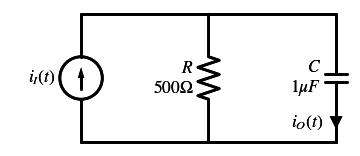

In [3]:
with schemdraw.Drawing(file='current-divider-resistor-capacitor.svg') as d:
    d += elm.SourceI().label('$i_I(t)$').up()
    d += elm.Line().right()
    d.push()
    d += elm.Line().right()
    d += (C:= elm.Capacitor().down().label('$C$\n$1 \mu F$'))
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Resistor().down().label('$R$\n$500 \Omega$')
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(C.end).label('$i_O(t)$')

`````{admonition} Example
 

```{figure} current-divider-resistor-capacitor.svg
---
height: 300px
name: current-divider-resistor-capacitor
---
```

Find $i_O(t)$ given that $i_I(t)=400 \cos(1000t-30^\circ)$ mA.

````{admonition} Solution using differential equations
:class: tip, dropdown

Here

$$ i_O(t) = C \frac{d~v_C(t)}{dt} $$

and applying Kirchhoff's Current Law (KCL) to the top node we get

$$ i_I(t) = v_R(t) / R  + C \frac{d~v_C(t)}{dt} $$

Rearranging this into Dawkins' preferred format, we get

$$ \frac{1}{RC} v_R(t) + \frac{d~v_C(t)}{dt} = 400 \cos(1000t-30^\circ) $$

and noting that $v_R(t) = v_C(t)$

$$ \frac{1}{RC} v(t) + \frac{d~v(t)}{dt} = 400 \cos(1000t-30^\circ) $$

For this example, our integrating factor $\mu(t)$ is now

$$ \mu(t) = e^{\frac{t}{RC}} $$

and multiplying both sides of our differential equation by this factor yields

$$ (\mu(t) v(t))^′ = \mu(t) 400 \cos(1000t-30^\circ ).$$

We can now integrate this as we did in the voltage divider example to give

\begin{align*}
\int (e^{\frac{t}{RC}} v(t))^′ dt &=  \int e^{\frac{t}{RC}} 400 \cos(1000t-30^\circ) dt \\
\int (e^{\frac{t}{5 \times 10^{-4}}} v(t))^′ dt &=  \int e^{\frac{t}{5 \times 10^{-4}}} 400 \cos(1000t-30^\circ) dt \\
e^{2000 t} v(t) + c &= 0.178885 e^{2000 t} \sin(1000 t + 33.4^\circ ) + k\\
v(t) &= 0.178885 \sin(1000 t + 33.4^\circ ) + \kappa e^{-2000 t} 
\end{align*}


````


`````

### Mesh Analysis

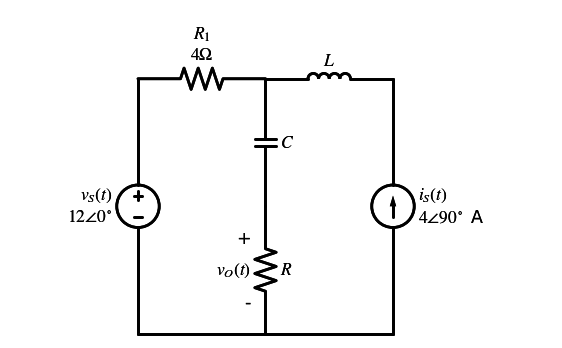

In [4]:
with schemdraw.Drawing(file='mesh-analysis-differential-equations.svg') as d:
    d += elm.SourceV().up().label('$v_S(t)$\n$12 \\angle 0^\circ$').length(6)
    d += elm.Resistor().right().label('$R_1$\n$4 \Omega$')
    d.push()
    d += elm.Inductor().right().label('$L$')
    d += elm.SourceI().down().label('$i_S(t)$\n$4 \\angle{90^\circ}$ A', loc='bot').length(6).reverse()
    d += elm.Line().length(6).left()
    d.pop()
    d += elm.Capacitor().down().label('$C$', loc='bot')    
    d += elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R$', loc='bot')


```{index} Mesh Analysis
```

````{admonition} Example
 
```{figure} mesh-analysis-differential-equations.svg
---
height: 600px
name: mesh-analysis-differential-equations
---
```


````

### Nodal Analysis

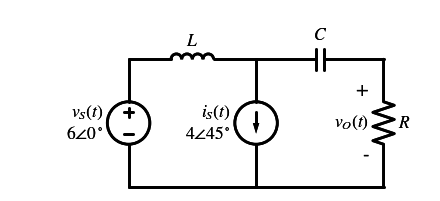

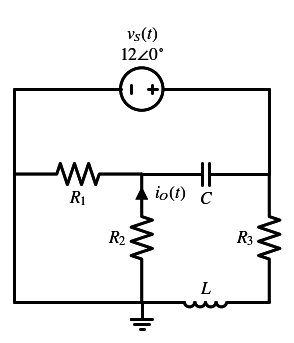

In [5]:
with schemdraw.Drawing(file='nodal-analysis-differential-equations.svg') as d:
    d += elm.SourceV().up().label('$v_S(t)$\n$6 \\angle 0^\circ$')
    d += elm.Inductor().right().label('$L$')
    d.push()
    d += elm.Capacitor().right().label('$C$')
    d += elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R$', loc='bot')
    d += elm.Line().length(6).left()
    d.pop()
    d += elm.SourceI().down().label('$i_S(t)$\n$4 \\angle{45^\circ}$')

with schemdraw.Drawing(file='nodal-analysis-differential-equations-2.svg') as d:
    d += elm.Line().length(3).up()
    d += elm.Line().length(2).up()    
    d += elm.SourceV().right().label('$v_S(t)$\n$12 \\angle 0^\circ$').length(6)
    d += elm.Line().length(2).down()
    d.push()
    d += elm.Resistor().label('$R_3$').down()
    d += elm.Inductor().left().label('$L$')
    d.push()
    d.push()
    d += elm.Ground().right()
    d.pop()
    d += (R2 := elm.Resistor().up().label('$R_2$'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$i_O(t)$', loc='bot')
    d.pop()
    d += elm.Line().left()
    d.pop()
    d += elm.Capacitor().left().label('$C$', loc='bot')    
    d += elm.Resistor().left().label('$R_1$', loc='bot')   
    

````{admonition} Example
 

```{figure} nodal-analysis-differential-equations.svg
---
height: 300px
name: nodal-analysis-differential-equations
---
```


````

````{admonition} Example
 

```{figure} nodal-analysis-differential-equations-2.svg
---
height: 600px
name: nodal-analysis-differential-equations-2
---
```


````

### Superposition

### Thevenin's Theorem

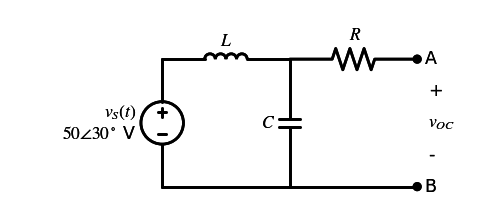

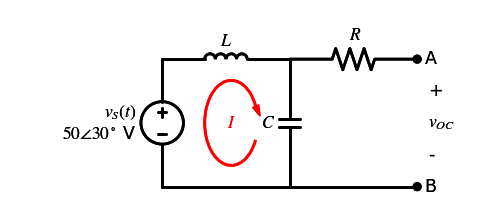

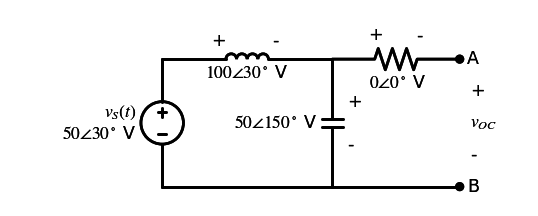

In [6]:
with schemdraw.Drawing(file='thevenin-differential-equations.svg') as d:
    d += elm.SourceV().up().label('$v_S(t)$\n$50 \\angle 30^\circ$ V')
    d += elm.Inductor().right().label('$L$')
    d.push()
    d += (R := elm.Resistor().right().label('$R$').dot().label('A', loc='right'))
    d.pop()
    d += elm.Capacitor().down().label('$C$', loc='top').label(['+', '$v_{OC}$', '-'], loc='bot', ofst=(0,3))   
    d.push()
    d += elm.Line().right().dot().label('B', loc='right')
    d.pop()
    d += elm.Line().left()
    d.move_from(R.end,0,0)

with schemdraw.Drawing(file='thevenin-differential-equations-mesh.svg') as d:
    d += (VS := elm.SourceV().up().label('$v_S(t)$\n$50 \\angle 30^\circ$ V'))
    d += (L := elm.Inductor().right().label('$L$'))
    d.push()
    d += (R := elm.Resistor().right().label('$R$').dot().label('A', loc='right'))
    d.pop()
    d += (C := elm.Capacitor().down().label('$C$', loc='top').label(['+', '$v_{OC}$', '-'], loc='bot', ofst=(0,3)))
    d.push()
    d += elm.Line().right().dot().label('B', loc='right')
    d.pop()
    d += (LN := elm.Line().left())
    d.move_from(R.end,0,0)
    d += elm.LoopCurrent([L,C,LN,VS], pad = 0.5).label('$I$').color('red')   

with schemdraw.Drawing(file='thevenin-differential-equations-voltages.svg') as d:
    d += (VS := elm.SourceV().up().label('$v_S(t)$\n$50 \\angle 30^\circ$ V'))
    d += (L := elm.Inductor().right().label(['+', '-'])).label('$100 \\angle 30^\circ$ V', loc='bot').length(4)
    d.push()
    d += (R := elm.Resistor().right().label(['+', '-']).label('$0 \\angle 0^\circ$ V', loc='bot').dot().label('A', loc='right'))
    d.pop()
    d += (C := elm.Capacitor().down().label('$50 \\angle 150^\circ$ V', loc='top').label(['+', '$v_{OC}$', '-'], loc='bot', ofst=(0,3)).label(['+', '-'], loc='bot'))
    d.push()
    d += elm.Line().right().dot().label('B', loc='right')
    d.pop()
    d += (LN := elm.Line().left().length(4))
    d.move_from(R.end,0,0)


```{index} Thevenin's Theorem
```

 

`````{admonition} Example
 

```{figure} thevenin-differential-equations.svg
---
height: 300px
name: thevenin-differential-equations
---
```

Find the Thevenin equivalent of the circuit above.

````{admonition} Solution
:class: tip, dropdown
Find $V\tss{OC}$ first. The load is already removed in this example so there is already an open circuit where the load will connect. Find the voltage across that open.

```{figure} thevenin-differential-equations-mesh.svg
---
height: 300px
name: thevenin-differential-equations-mesh
---
```

We can find I using mesh analysis on the single mesh.

$$ (50\angle{30^\circ}~V)-(j20~\Omega)I-(-j10~\Omega)I=0 $$

so

$$ I=\frac{(50\angle{30^\circ}~V)}{(j10~\Omega)}=(5\angle{-60^\circ}~A) $$

Using $I$ we can find the voltage across the inductor and capacitor

$$ V_L=(5\angle{-60^\circ}~A)(j20~\Omega)=(100\angle{30^\circ}~V) $$

and

$$ V_C=(5\angle{-60^\circ}~A)(-j10~\Omega)=(50\angle{-150^\circ}~V) $$

There is no current through the resistor since it is not part of a closed path. Therefore there is no voltage across it. We can label all of these voltage on the schematic

```{figure} thevenin-differential-equations-voltages.svg
---
height: 300px
name: thevenin-differential-equations-voltages
---
```

Now we can write a KVL that includes the unknown $V_{OC}$. I chose to move over the capacitor, resistor, and open since it is the shortest loop that included $V_{OC}$.

$$ (50\angle{-150^\circ}~V)-(0~V)-V_{OC}=0 $$

which reduces to

$$ V_{OC}=50\angle{-150^\circ}~V=V_{TH} $$

which is the Thevenin voltage.
Next, we find $Z\tss{TH}$. There are no dependent supplies in this circuit so we can treat it as an equivalent impedance problem. This is method \#1 presented in the Thevenin section. Replace the voltage supply with its ideal impedance, a short.

```{figure} logo.png
---
height: 300px
name: LABEL_8
---
```

For this circuit

$$ Z\tss{TH}=R+(L||C)=10-j20~\Omega $$

We can now draw the Thevenin equivalent circuit since we have both $V\tss{TH}$ and $Z\tss{TH}$.

```{figure} logo.png
---
height: 300px
name: LABEL_9
---
```


````
`````

### Norton's Theorem


```{index} Norton's Theorem
```


### Source Conversions


```{index} Source Conversions
```

`````{admonition} Example
 

```{figure} logo.png
---
height: 300px
name: LABEL_10
---
```

Find $I_O$

````{admonition} Solution
:class: tip, dropdown
First, look for any impedances that are in series/parallel. The $1~\Omega$ resistor on the left and the $j1~\Omega$ inductor are in series. Also, the $1~\Omega$ resistor on the right and the $-j1~\Omega$ capacitor are in series. Both combinations are shown in the schematic below as a generic impedance. They appear as a box with an impedance label.

Second look for, voltage supplies in series or current supplies in parallel. In this case the two voltage supplies are in series. Their polarities match so they add together. Take a moment to practice these calculations either on your calculator or by hand.

```{figure} logo.png
---
height: 300px
name: LABEL_11
---
```

No more impedances or sources can be comined yet. Now we consider if we can perform any source transformations. There are no current sources so there are no Norton equivalents to consider. There is a voltage source so we can consider whether it is a Thevenin equivalent. Does it have an impedance in series? Yes, the $1+j1~\Omega$ impdeance. Those two components can be transformed into a Norton equivalent and reconnected to the rest of the circuit as the load.

```{figure} logo.png
---
height: 300px
name: LABEL_12
---
```

Note that the current of the Norton equivalent is $(8+j2~V)/(1+j1~\Omega)$=$(5-j3~A)$

After the transformation we can again look for impedances in series/parallel, voltage sources in series, or current supplies in parallel. The $1+j1~\Omega$ and $1-j1~\Omega$ impedances are in parallel. They are not next to each other but they are connected to the same two nodes.

```{figure} logo.png
---
height: 300px
name: LABEL_13
---
```

Those two impedances combine to a $1~\Omega$ impedance.

From this point we can use a simple current divider to find $I_O$.

$$ I_O=(5-j3~A)\left[\frac{1}{1+1}\right]=2.5-j1.5~A=2.915\angle{-30.96^\circ}~A $$
````

`````

## References

```{bibliography} ./references.bib
:filter: docname in docnames
```